In [2]:
# 이미 잘 설계된 SRGAN 모델 불러오기

import tensorflow as tf
import os

model_file = 'model/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

(400, 369)


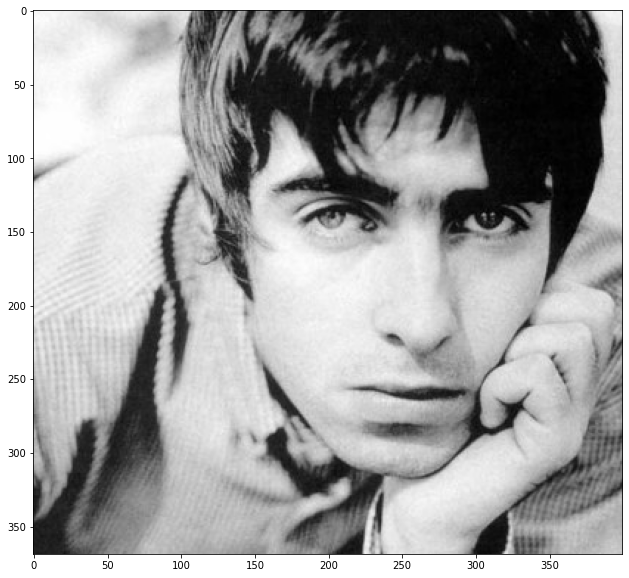

In [3]:
# 사진 불러오기

import cv2
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow_datasets as tfds
#import os
from PIL import Image
#import tensorflow as tf

image_path = './liam.jpg' # 이미지 주소
hr = Image.open(image_path)
print(hr.size)
plt.figure(figsize=(20,10))
plt.imshow(hr)

400 369
(92, 100, 3)


Text(0.5, 1.0, 'original')

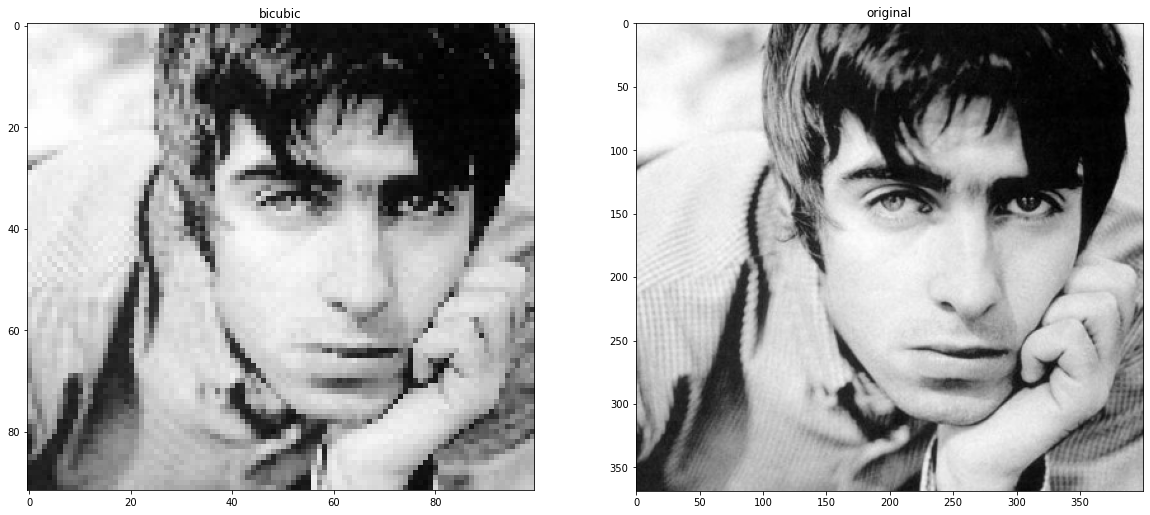

In [4]:
# 흐린 이미지 생성
# bicubic써서 크기를 1/4로 줄이기 

w, h = hr.size[0], hr.size[1]
print(w, h)
#400 369
hr = np.array(hr)
bicubic_lr = cv2.resize(hr, dsize=(w//4, h//4), interpolation=cv2.INTER_CUBIC) # bicubic 설정
print(bicubic_lr.shape)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_lr); plt.title('bicubic') # 줄어든 이미지
plt.subplot(1,2,2); plt.imshow(hr); plt.title('original') # 원본이미지

In [5]:
# srgan 적용 함수 정의

import numpy as np

def apply_srgan(image):
    print(type(image), image.shape)
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    print(type(image), image.shape)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]
print('줄어든 이미지 :', bicubic_lr.shape)

# SRGAN 써서 해상도 높이기
srgan_hr = apply_srgan(bicubic_lr)
print('SRGAN 적용 후 이미지 : ',srgan_hr.shape)

## bicubiv_lr, srgan_hr이 3채널이어야 함. 3채널 이미지를 사용해야 함!!!!!

줄어든 이미지 : (92, 100, 3)
<class 'numpy.ndarray'> (92, 100, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 92, 100, 3)
SRGAN 적용 후 이미지 :  (368, 400, 3)


(375, 878, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> (375, 200, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 375, 200, 3)


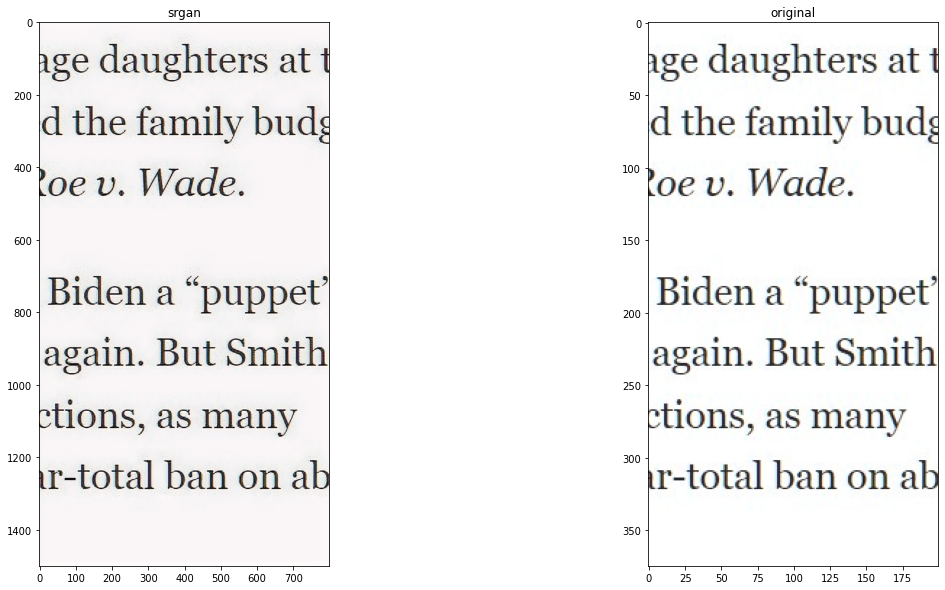

In [10]:
## 다른 이미지 넣어보기
tmp = cv2.imread('imgs/np2.jpg')
print(tmp.shape)

# 결론: 애초에 이미지를 잘 잘라서 그리 크지 않게 넣기

#tmp = np.resize(tmp, (tmp.shape[0]//2, tmp.shape[1]//2, 3))
#tmp = tf.image.resize_with_crop_or_pad(tmp, tmp.shape[0]//2, tmp.shape[1]//2)
tmp = tf.image.random_crop(tmp, size=[tmp.shape[0], 200, 3]) # 넣는 이미지 크기가 크면 안 되는 것 같다!!!!!!!! 878은 너무 컸나봄
#size=[96,96,3]
srgan_tmp = apply_srgan(tmp)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('srgan')
plt.imshow(srgan_tmp)

plt.subplot(1,2,2)
plt.title('original')
plt.imshow(tmp)
plt.show()

# 화질 좋아진 거 확인

(369, 400, 3)


Text(0.5, 1.0, 'original hr image')

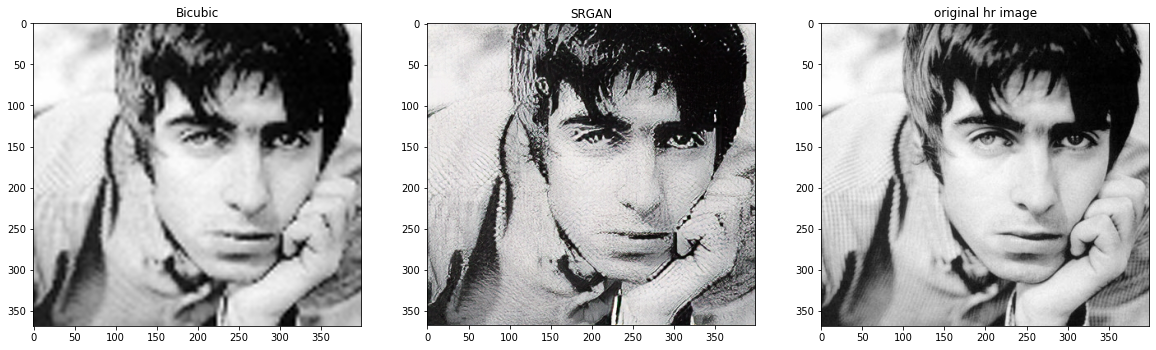

In [32]:
# 결과 시각화 (바이큐빅, srgan, 오리지널)

bicubic_lr_resized = cv2.resize(bicubic_lr, dsize=(w, h), interpolation=cv2.INTER_CUBIC) # bicubic 설정. 줄인 이미지 다시 원래크기로.
print(bicubic_lr_resized.shape)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(bicubic_lr_resized); plt.title('Bicubic')
plt.subplot(1,3,2); plt.imshow(srgan_hr); plt.title('SRGAN')
plt.subplot(1,3,3); plt.imshow(hr); plt.title('original hr image')

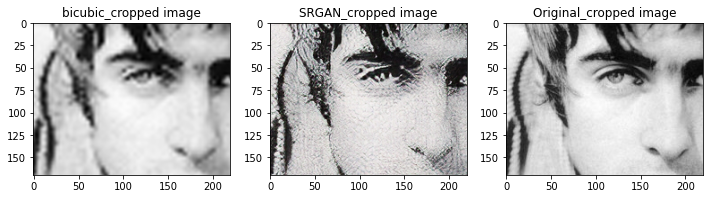

In [33]:
# 크롭해서 자세히 살펴보기

plt.figure(figsize=(12,10))
crop_img_bc = bicubic_lr_resized[80:250,80:300]#슬라이싱
plt.subplot(1,3,1)
plt.imshow(crop_img_bc)
plt.title('bicubic_cropped image')

crop_img = srgan_hr[80:250,80:300]#슬라이싱
plt.subplot(1,3,2)
plt.imshow(crop_img)
plt.title('SRGAN_cropped image')

crop_img_org = hr[80:250,80:300]
plt.subplot(1,3,3)
plt.imshow(crop_img_org)
plt.title('Original_cropped image')

plt.show()